# Лабораторная работа №12
## Решение краевых задач методом разностных аппроксимаций
### Вариант 17
*Задание 1.* Составить разностную схему и получить численное решение краевой задачи с точностью $10^{-3}$.
- $y''+(1+x^2)y=-1, -1\le x\le -1, y(-1)=y(1)=0$
- $ay''+(1+bx^2)y=-1, -1\le x\le -1, y(-1)=y(1)=0, a=sin(17), b=cos(17)$

In [10]:
# importing necessary libraries

import numpy as np
import math
import scipy as sp
from scipy import sparse
import matplotlib.pyplot as plt

In [4]:
# variant number
K = 17

Напишем функцию, решающую линейную краевую задачу вида $y''-p(x)y=f(x), p(x)>0, a \le x \le b,  y(a)=A, y(b)=B$.

Раздедим отрезок $[a,b]$ на $n=\frac{b-a}{h}$ частей. Заменим $y''(x_k)=\frac{y_{k+1}-2y_k+y_{k-1}}{h^2}, k=1,n-1.$
Получаем $y_{k+1}-(2+h^2p(x_k))y_k+y_{k-1}=h^2f(x_k), k=1,n-1$.

Получили трехдиагональную систему из $n-1$ уравнений с $n-1$ неизвестными. Решая систему методом прогонки, найдем приближенное решение краевой задачи.

In [5]:
def solve_de(px, fx, a, b, n=2000):
    h = (b - a) / n
    X = np.linspace(a, b, n + 1) # строим сетку иксов
    P = px(X)
    
    # data содержит три вектора: 
    # первый - значения диагонали ниже главной; 
    # второй - значения главной диагонали;
    # третий - значения диагонали выше главной.

    data = np.array([[1] * (n-1), [-(h * h * P[i] + 2) for i in range(1, n)], [1] * (n - 1)])
    
    offsets = [-1, 0, 1]               # отступы относительно главной диагонали
    
    # строим трехдиагональную матрицу
    M = sparse.dia_matrix((data, offsets), shape=(n - 1, n - 1)).toarray()
    M = np.insert(M, 0, np.array([0] * (n - 1)), 0)
    M = np.insert(M, n, np.array([0] * (n - 1)), 0)
    M = np.insert(M, 0, np.array([1, 1] + [0] * (n - 1)), 1)
    M = np.insert(M, n, np.array([0] * (n - 1) + [1, 1]), 1)
    print(M)
    
    F = fx(X) * h * h
    F[0] = 0
    F[-1] = 0
    
    print(F)
    solution = np.linalg.solve(M, F)
    return X, solution

Найдем $p(x)$ и $f(x)$ для первого случая.

Очевидно, что $p(x)=-(1+x^2)$, $f(x)=-1$.

In [7]:
def px1(x):
    return - 1 - x * x

In [8]:
def fx1(x):
    return -1 + (x - x);

In [9]:
X, sol = solve_de(px1, fx1, -1, 1, n=5)

[[ 1.      0.      0.      0.      0.      0.    ]
 [ 1.     -1.7824  1.      0.      0.      0.    ]
 [ 0.      1.     -1.8336  1.      0.      0.    ]
 [ 0.      0.      1.     -1.8336  1.      0.    ]
 [ 0.      0.      0.      1.     -1.7824  1.    ]
 [ 0.      0.      0.      0.      0.      1.    ]]
[ 0.   -0.16 -0.16 -0.16 -0.16  0.  ]


Text(0, 0.5, '$y$')

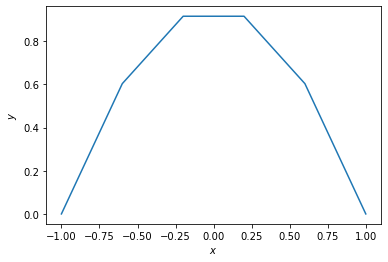

In [10]:
plt.plot(X, sol)
plt.xlabel('$x$')
plt.ylabel('$y$')

Найдем $p(x)$ и $f(x)$ для второго случая.

Разделим все уравнение на $a$ и преобразуем. Получим $y''+\frac{1+bx^2}{a}y=-\frac{1}{a}$. Тогда $p(x)=-\frac{1+bx^2}{a}$, $f(x)=-\frac{1}{a}$, или  $p(x)=-\frac{1+cos(k)x^2}{sin(k)}$, $f(x)=-\frac{1}{sin(k)}$

In [11]:
def px2(x):
    return - (1 + np.cos(K) * x * x) / np.sin(K)

In [12]:
def fx2(x):
    return (x - x) - 1 / np.sin(K)

In [13]:
X, sol2 = solve_de(px2, fx2, -1, 1)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 1.         -2.00000075  1.         ...  0.          0.
   0.        ]
 [ 0.          1.         -2.00000076 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -2.00000076  1.
   0.        ]
 [ 0.          0.          0.         ...  1.         -2.00000075
   1.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]
[0.0000000e+00 1.0401525e-06 1.0401525e-06 ... 1.0401525e-06 1.0401525e-06
 0.0000000e+00]


Text(0, 0.5, '$y$')

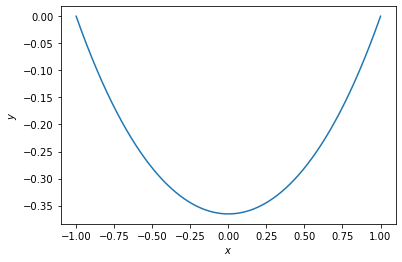

In [14]:
plt.plot(X, sol2)
plt.xlabel('$x$')
plt.ylabel('$y$')

In [15]:
np.max(sol)

0.9163772797453755

In [16]:
np.min(sol2)

-0.36532656231899147

[[ 1.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 1.     -1.9344  1.      0.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      1.     -1.9456  1.      0.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      1.     -1.9536  1.      0.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      1.     -1.9584  1.      0.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      0.      1.     -1.96    1.      0.      0.
   0.      0.    ]
 [ 0.      0.      0.      0.      0.      1.     -1.9584  1.      0.
   0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      1.     -1.9536  1.
   0.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      1.     -1.9456
   1.      0.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      1.
  -1.9344  1.    ]
 [ 0.      0.      0.      0.      0.      0.      0.      0.      0.
   0.      1.    ]]
[ 0.   -0.04 -0.

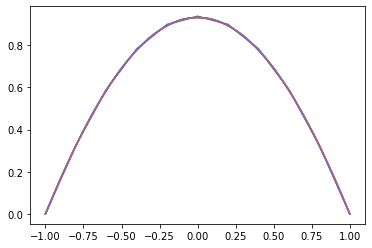

In [17]:
nset = [10, 20, 100, 200, 500]
for i in nset:
    X, solution = solve_de(px1, fx1, -1, 1, i)
    plt.plot(X, solution)

[[ 1.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 1.         -2.03427908  1.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          1.         -2.03748465  1.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          1.         -2.03977434  1.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.         -2.04114816  1.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.         -2.0416061
   1.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          1.
  -2.04114816  1.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   1.         -2.0397743

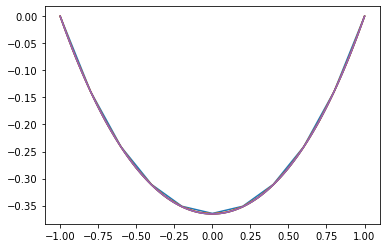

In [18]:
for i in nset:
    X, solution = solve_de(px2, fx2, -1, 1, i)
    plt.plot(X, solution)

*Задание 2.* Найти приближенное решение краевой задачи методом
конечных разностей:
- $y''+p(x)y'+q(x)y=f(x)$
- $a\le x\le b, y(a)=YA y(b)=YB$
- $p(x)=0.5sin(x), q(x)=7(1+sin^2(x)), f(x)=6(1+x^2)$
- $a=0, b=2, YA=4, YB=0$
c заданной точностью ε=0.05 и построить его график.

In [20]:
def p(x: float) -> float:
    return 0.5*math.sin(x)

In [21]:
def q(x) -> float:
    return 7* (1 + math.sin(x)**2)

In [22]:
def f(x) -> float:
    return 6 * (1+x*x)

In [24]:
def get_norm(values: list, step: float) -> float:
    # summ: float = 0.0
    #
    # for value in values:
    #     summ += value * value * step
    #
    # return math.sqrt(summ)
    return max(*values[0:-1])

In [34]:
def get_2_task_solution_with_number_of_subranges(n: int, Ua: float, Ub: float, interval: tuple) -> tuple:
    step: float = (interval[1] - interval[0]) / n

    y_kprev = lambda x: 2 - p(x) * step
    y_k = lambda x: q(x) * 2 * step * step - 4
    y_knext = lambda x: 2 + p(x) * step

    b_k = lambda x: 2 * step * step * f(x) # for free coefficients vector

    free_coefficients: list[float] = [Ua]
    main_coefficients: list[list[float]] = [[0] * (n + 1)]
    main_coefficients[0][0] = 1

    x_array: list[float] = [interval[0]]

    for k in range(1, n):
        new_row: list[float] = [0] * (n + 1)
        new_row[k - 1] = y_kprev(x_array[-1])
        x_array.append(x_array[-1] + step)
        new_row[k] = y_k(x_array[-1])
        new_row[k + 1] = y_knext(x_array[-1] + step)

        main_coefficients.append(new_row)
        free_coefficients.append(b_k(x_array[-1]))

    x_array.append(interval[1])

    main_coefficients.append([0] * (n + 1))
    main_coefficients[-1][-1] = 1
    free_coefficients.append(Ub)

    y_array: list[float] = list(np.linalg.solve(main_coefficients, free_coefficients))

    plt.plot(x_array, y_array, mew=2, ms=10)
    plt.show()

    return x_array, y_array, get_norm(y_array, step)

In [35]:
def get_2_task_solution(epsilon: float, Ua: float, Ub: float, interval: tuple) -> None:
    number_of_ranges: int = 3

    first_solution = get_2_task_solution_with_number_of_subranges(number_of_ranges, Ua, Ub, interval)
    print(number_of_ranges)

    number_of_ranges *= 2
    print(number_of_ranges)

    second_solution = get_2_task_solution_with_number_of_subranges(number_of_ranges, Ua, Ub, interval)
    print(abs(first_solution[2] - second_solution[2]))

    while abs(first_solution[2] - second_solution[2]) > epsilon:
        number_of_ranges *= 2
        first_solution = second_solution
        second_solution = get_2_task_solution_with_number_of_subranges(number_of_ranges, Ua, Ub, interval)
        print(number_of_ranges)
        print(abs(first_solution[2] - second_solution[2]))

In [36]:
def solve_task2() -> None:
    Ua, Ub = 4, 0
    interval: tuple[float, float] = (0, 2)
    epsilon: float = 0.05
    get_2_task_solution(epsilon, Ua, Ub, interval)

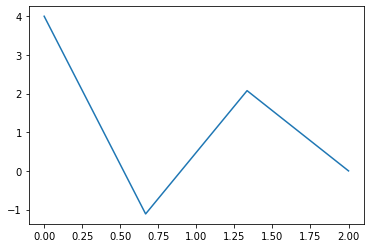

3
6


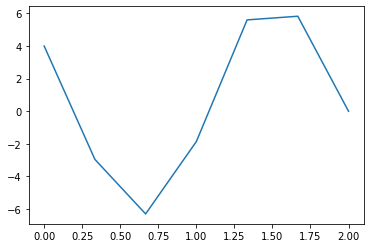

1.8289123023355218


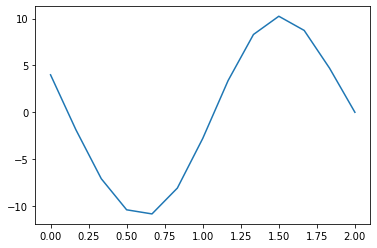

12
4.418032897770051


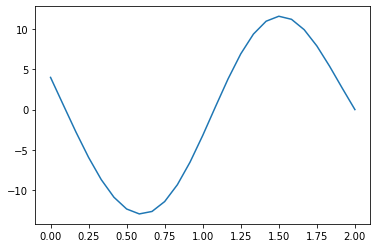

24
1.35133909060505


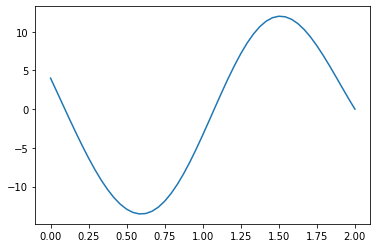

48
0.3935086792307896


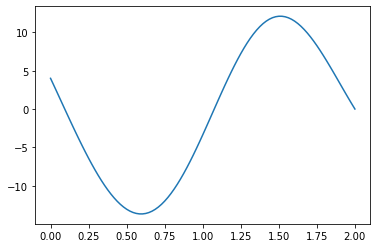

96
0.10246147093541502


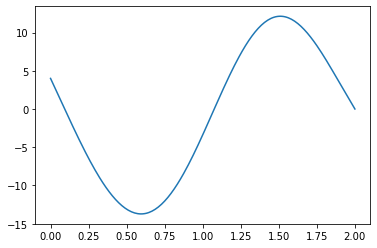

192
0.03292537030991305


In [37]:
solve_task2()

*Задание 3.* Методом конечных разностей найти приближенное решение
указанной в индивидуальном варианте краевой задачи c
точностью ε и построить его график. Решение системы разностных
уравнений найти, используя метод прогонки.
- $y''-xy'+0.2y=x+1$
- $y(0.9)-0.5y'(0.9)=2$
- $y(2.9)=1$
- $ε=0.04$

In [5]:
INTERVAL: tuple = (0.9, 2.9)

def get_norm(values: list, step: float) -> float:
    summ: float = 0.0

    for value in values:
        summ += value * value * step

    return math.sqrt(summ)
    return max(*values[0:-1])

In [6]:
# initial conditions are "hardcoded" in this solution below:
def get_3_task_solution_with_number_of_subranges(n: int) -> tuple:
    step: float = (INTERVAL[1] - INTERVAL[0]) / n

    y_kprev = lambda x: 2 + x * step
    y_k = lambda x: 0.4 * step * step - 4
    y_knext = lambda x: 2 - x * step

    b_k = lambda x: (x + 1) * 2 * step * step # for free coefficients vector

    # coefficients matrices with first initial condition already
    free_coefficients: list[float] = [4 * step]
    main_coefficients: list[list[float]] = [[0] * (n + 1)]
    main_coefficients[0][0] = 2 * step + 1.5
    main_coefficients[0][1] = -2
    main_coefficients[0][2] = 0.5

    x_array: list[float] = [INTERVAL[0]]

    for k in range(1, n):
        new_row: list[float] = [0] * (n + 1)
        new_row[k - 1] = y_kprev(x_array[-1])
        x_array.append(x_array[-1] + step)
        new_row[k] = y_k(x_array[-1])
        new_row[k + 1] = y_knext(x_array[-1] + step)

        main_coefficients.append(new_row)
        free_coefficients.append(b_k(x_array[-1]))

    x_array.append(INTERVAL[1])

    main_coefficients.append([0] * (n + 1))
    main_coefficients[-1][-1] = 1
    free_coefficients.append(1)

    y_array: list[float] = list(np.linalg.solve(main_coefficients, free_coefficients))

    plt.plot(x_array, y_array, mew=2, ms=10)
    plt.show()

    return x_array, y_array, get_norm(y_array, step)


In [7]:
def get_3_task_solution(epsilon: float) -> None:
    number_of_ranges: int = 3

    first_solution = get_3_task_solution_with_number_of_subranges(number_of_ranges)
    print(number_of_ranges)

    number_of_ranges *= 2
    print(number_of_ranges)

    second_solution = get_3_task_solution_with_number_of_subranges(number_of_ranges)
    print(abs(first_solution[2] - second_solution[2]))

    while abs(first_solution[2] - second_solution[2]) > epsilon:
        number_of_ranges *= 2
        first_solution = second_solution
        second_solution = get_3_task_solution_with_number_of_subranges(number_of_ranges)
        print(number_of_ranges)
        print(abs(first_solution[2] - second_solution[2]))

In [8]:
def solve_task3() -> None:
    epsilon: float = 0.04
    get_3_task_solution(epsilon)

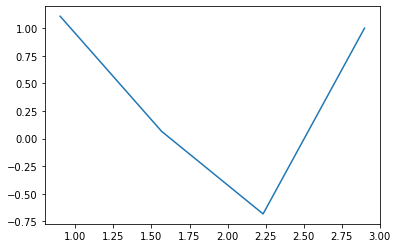

3
6


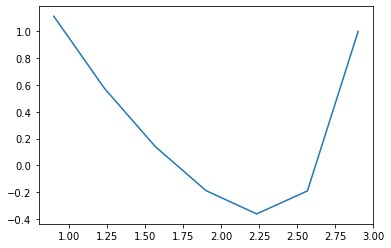

0.3763689728870626


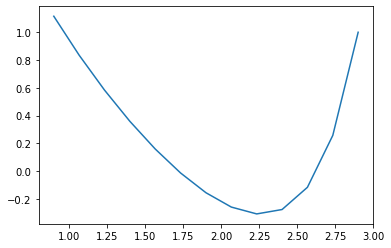

12
0.1711234168705309


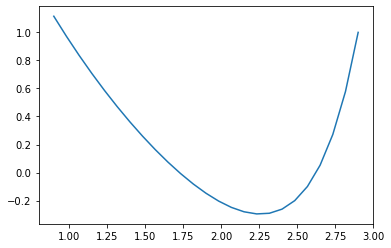

24
0.08103112951943459


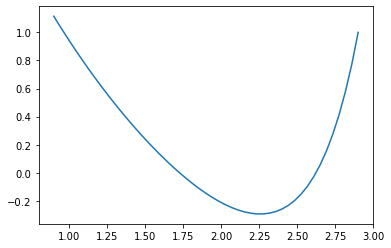

48
0.03889307894889582


In [11]:
solve_task3()

*Задание 4.* Методом конечных разностей найти приближенное решение
краевой задачи с тремя верными значащими цифрами. Решение системы
разностных уравнений найти, используя метод прогонки.
- $(-k(x)y')'+q(x)y=f(x), x=(a,b)$
- $-k(a)y'(a)+0.5y(a)=0$
- $k(b)y'(b)+0.5y(b)=0$
- $a=0, b=1.5, c=0.875, k(x)=0.5$ при $х=(a,c), k(x)=1.8$ при $х=(c,b), q(x)=5.6$ при $х=(a,c), k(x)=8.5$ при $х=(c,b), f(x)=9x(3.5-x)$

In [12]:
a: float = 0
b: float = 1.5
c: float = 0.875

In [13]:
def K(x: float) -> float:
    if a <= x <= c:
        return 0.5
    else:
        return 1.8

In [14]:
def Q(x: float) -> float:
    if a <= x <= c:
        return 5.6
    else:
        return 8.5

In [15]:
def F(x: float) -> float:
    return 9 * x * (3.5-x)

In [17]:
def get_norm(values: list, step: float) -> float:
    summ: float = 0.0

    for value in values:
        summ += value * value * step

    return math.sqrt(summ)
    return max(*values[0:-1])


In [20]:
# initial conditions are "hardcoded" in this solution below:
def get_4_task_solution_with_number_of_subranges(n: int) -> tuple:
    step: float = (b - a) / n

    y_kprev = lambda x: K(x)
    y_k = lambda x: 2 * step * Q(x)
    y_knext = lambda x: -1 * K(x)

    b_k = lambda x: 2 * step * F(x) # for free coefficients vector

    # coefficients matrices with first initial condition already
    free_coefficients: list[float] = [0]
    main_coefficients: list[list[float]] = [[0] * (n + 1)]
    main_coefficients[0][0] = 3 * K(a) + step
    main_coefficients[0][1] = -4 * K(a)
    main_coefficients[0][2] = K(a)

    x_array: list[float] = [a]

    for k in range(1, n):
        new_row: list[float] = [0] * (n + 1)
        new_row[k - 1] = y_kprev(x_array[-1])
        x_array.append(x_array[-1] + step)
        new_row[k] = y_k(x_array[-1])
        new_row[k + 1] = y_knext(x_array[-1] + step)

        main_coefficients.append(new_row)
        free_coefficients.append(b_k(x_array[-1]))

    x_array.append(b)

    main_coefficients.append([0] * (n + 1))
    main_coefficients[-1][-3] = K(b)
    main_coefficients[-1][-2] = -4 * K(b)
    main_coefficients[-1][-1] = 3 * K(b) + step

    free_coefficients.append(0)

    y_array: list[float] = list(np.linalg.solve(main_coefficients, free_coefficients))

    plt.plot(x_array, y_array, mew=2, ms=10)
    plt.show()

    return x_array, y_array, get_norm(y_array, step)

In [21]:
def get_4_task_solution(epsilon: float) -> None:
    number_of_ranges: int = 3

    first_solution = get_4_task_solution_with_number_of_subranges(number_of_ranges)
    print(number_of_ranges)

    number_of_ranges *= 2
    print(number_of_ranges)

    second_solution = get_4_task_solution_with_number_of_subranges(number_of_ranges)
    print(abs(first_solution[2] - second_solution[2]))

    while abs(first_solution[2] - second_solution[2]) > epsilon:
        number_of_ranges *= 2
        first_solution = second_solution
        second_solution = get_4_task_solution_with_number_of_subranges(number_of_ranges)
        print(number_of_ranges)
        print(abs(first_solution[2] - second_solution[2]))

In [26]:
def solve_task4() -> None:
    epsilon: float = 0.001
    get_3_task_solution(epsilon)

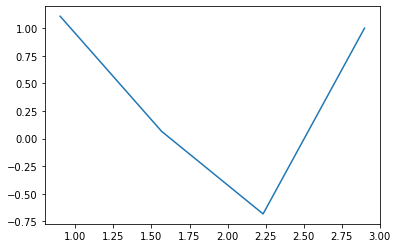

3
6


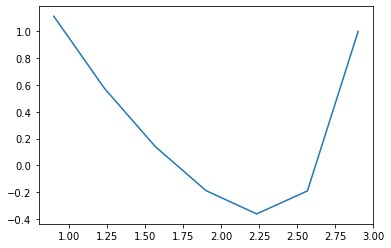

0.3763689728870626


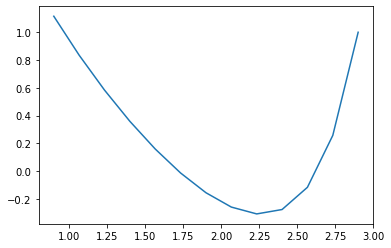

12
0.1711234168705309


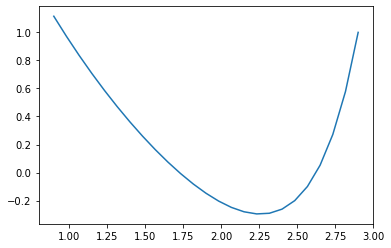

24
0.08103112951943459


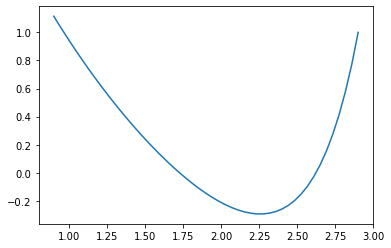

48
0.03889307894889582


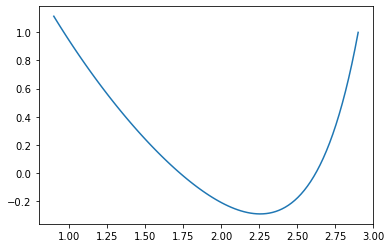

96
0.01894705399063268


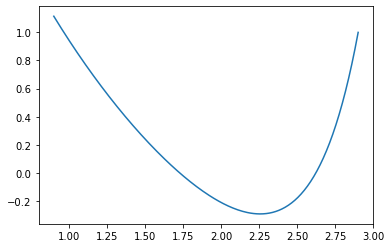

192
0.00933434142658951


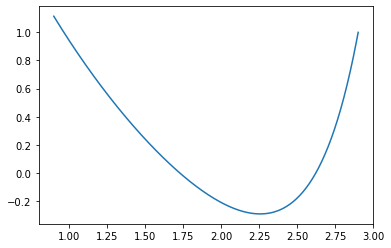

384
0.004630403877576628


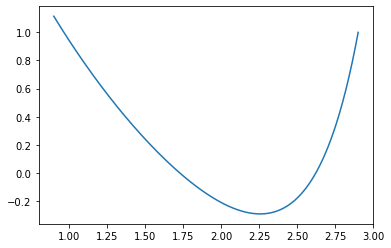

768
0.0023057519770108836


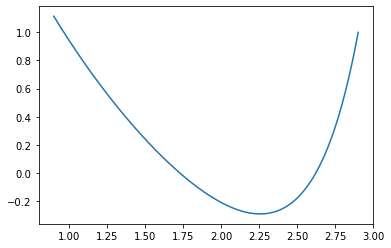

1536
0.001150480450597624


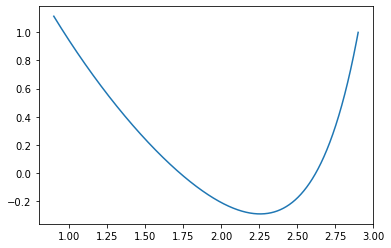

3072
0.0005746371510289006


In [27]:
solve_task4()